#**Лабораторная работа по ММАД №3**

##**Выполнил: Степанищев Степан Владимирович, гр. 23171**

##***Задание 1***

###Скачиваем обучающую и тестовую выборки в соответствии с 7 вариантом (Forest type mapping) https://archive.ics.uci.edu/dataset/333/forest+type+mapping

---

###Подключаем библиотеки

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

###Проанализируем набор данных: статистику по переменным, классы, количество объектов, количество пропущенных значений.

---


In [2]:
def giveClassName(a):
  proper_name =""
  if a == 's ':
    proper_name = 's: Sugi forest'
  elif a == 'h ':
    proper_name = 'h: Hinoki forest'
  elif a == 'd ':
    proper_name = 'd: Mixed deciduous forest'
  else:
    proper_name = 'o: Other non-forest land'
  return proper_name

In [49]:
train_df = pd.read_csv('/content/training.csv')
test_df = pd.read_csv('/content/testing.csv')

train_X = train_df.drop('class', axis=1)
train_Y = train_df.iloc[:, 0]

print("Количество объектов: ", len(train_df), "\n")
print("Количество пропущенных значений: ")
display(train_X.isna().sum())
print("\n")

print("Классы: ")
classes = train_Y.unique()
display(list(map(giveClassName, classes.tolist())))
print("\n")


print("Статистика по переменным: ")
display(train_X.describe())
print("\n")


Количество объектов:  198 

Количество пропущенных значений: 


b1                     0
b2                     0
b3                     0
b4                     0
b5                     0
b6                     0
b7                     0
b8                     0
b9                     0
pred_minus_obs_H_b1    0
pred_minus_obs_H_b2    0
pred_minus_obs_H_b3    0
pred_minus_obs_H_b4    0
pred_minus_obs_H_b5    0
pred_minus_obs_H_b6    0
pred_minus_obs_H_b7    0
pred_minus_obs_H_b8    0
pred_minus_obs_H_b9    0
pred_minus_obs_S_b1    0
pred_minus_obs_S_b2    0
pred_minus_obs_S_b3    0
pred_minus_obs_S_b4    0
pred_minus_obs_S_b5    0
pred_minus_obs_S_b6    0
pred_minus_obs_S_b7    0
pred_minus_obs_S_b8    0
pred_minus_obs_S_b9    0
dtype: int64



Классы: 


['d: Mixed deciduous forest',
 'h: Hinoki forest',
 's: Sugi forest',
 'o: Other non-forest land']



Статистика по переменным: 


,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162,50.818889,...,-5.594141,-20.037576,-1.007121,-4.355657,-20.996919,-0.973737,-4.597626,-18.840000,-1.570808,-4.155859
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158,12.842321,...,9.769193,4.948562,1.783671,2.352311,6.490763,0.702619,1.736712,5.251095,1.807792,1.982423
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000,7.660000,...,-53.530000,-32.950000,-8.800000,-11.210000,-40.370000,-3.270000,-8.730000,-34.140000,-8.870000,-10.830000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000,40.667500,...,-6.627500,-23.325000,-1.860000,-5.790000,-24.090000,-1.290000,-5.747500,-22.237500,-2.370000,-5.122500
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000,53.030000,...,-2.255000,-20.020000,-0.970000,-4.350000,-20.465000,-0.945000,-4.540000,-19.200000,-1.420000,-4.125000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000,59.920000,...,0.247500,-17.787500,-0.042500,-2.882500,-17.955000,-0.642500,-3.617500,-16.227500,-0.655000,-3.105000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000,83.320000,...,5.740000,5.130000,12.460000,7.370000,1.880000,3.440000,3.940000,3.670000,8.840000,7.790000


Все переменные, кроме целевой, являются количественными. Целевая переменная, качественная, определяет тип леса. Пропущенных значений нет. Тренировочная выборка состоит всего из 198 объектов.

##***Задание 2***

###Строим и рисуем дерево решений

---


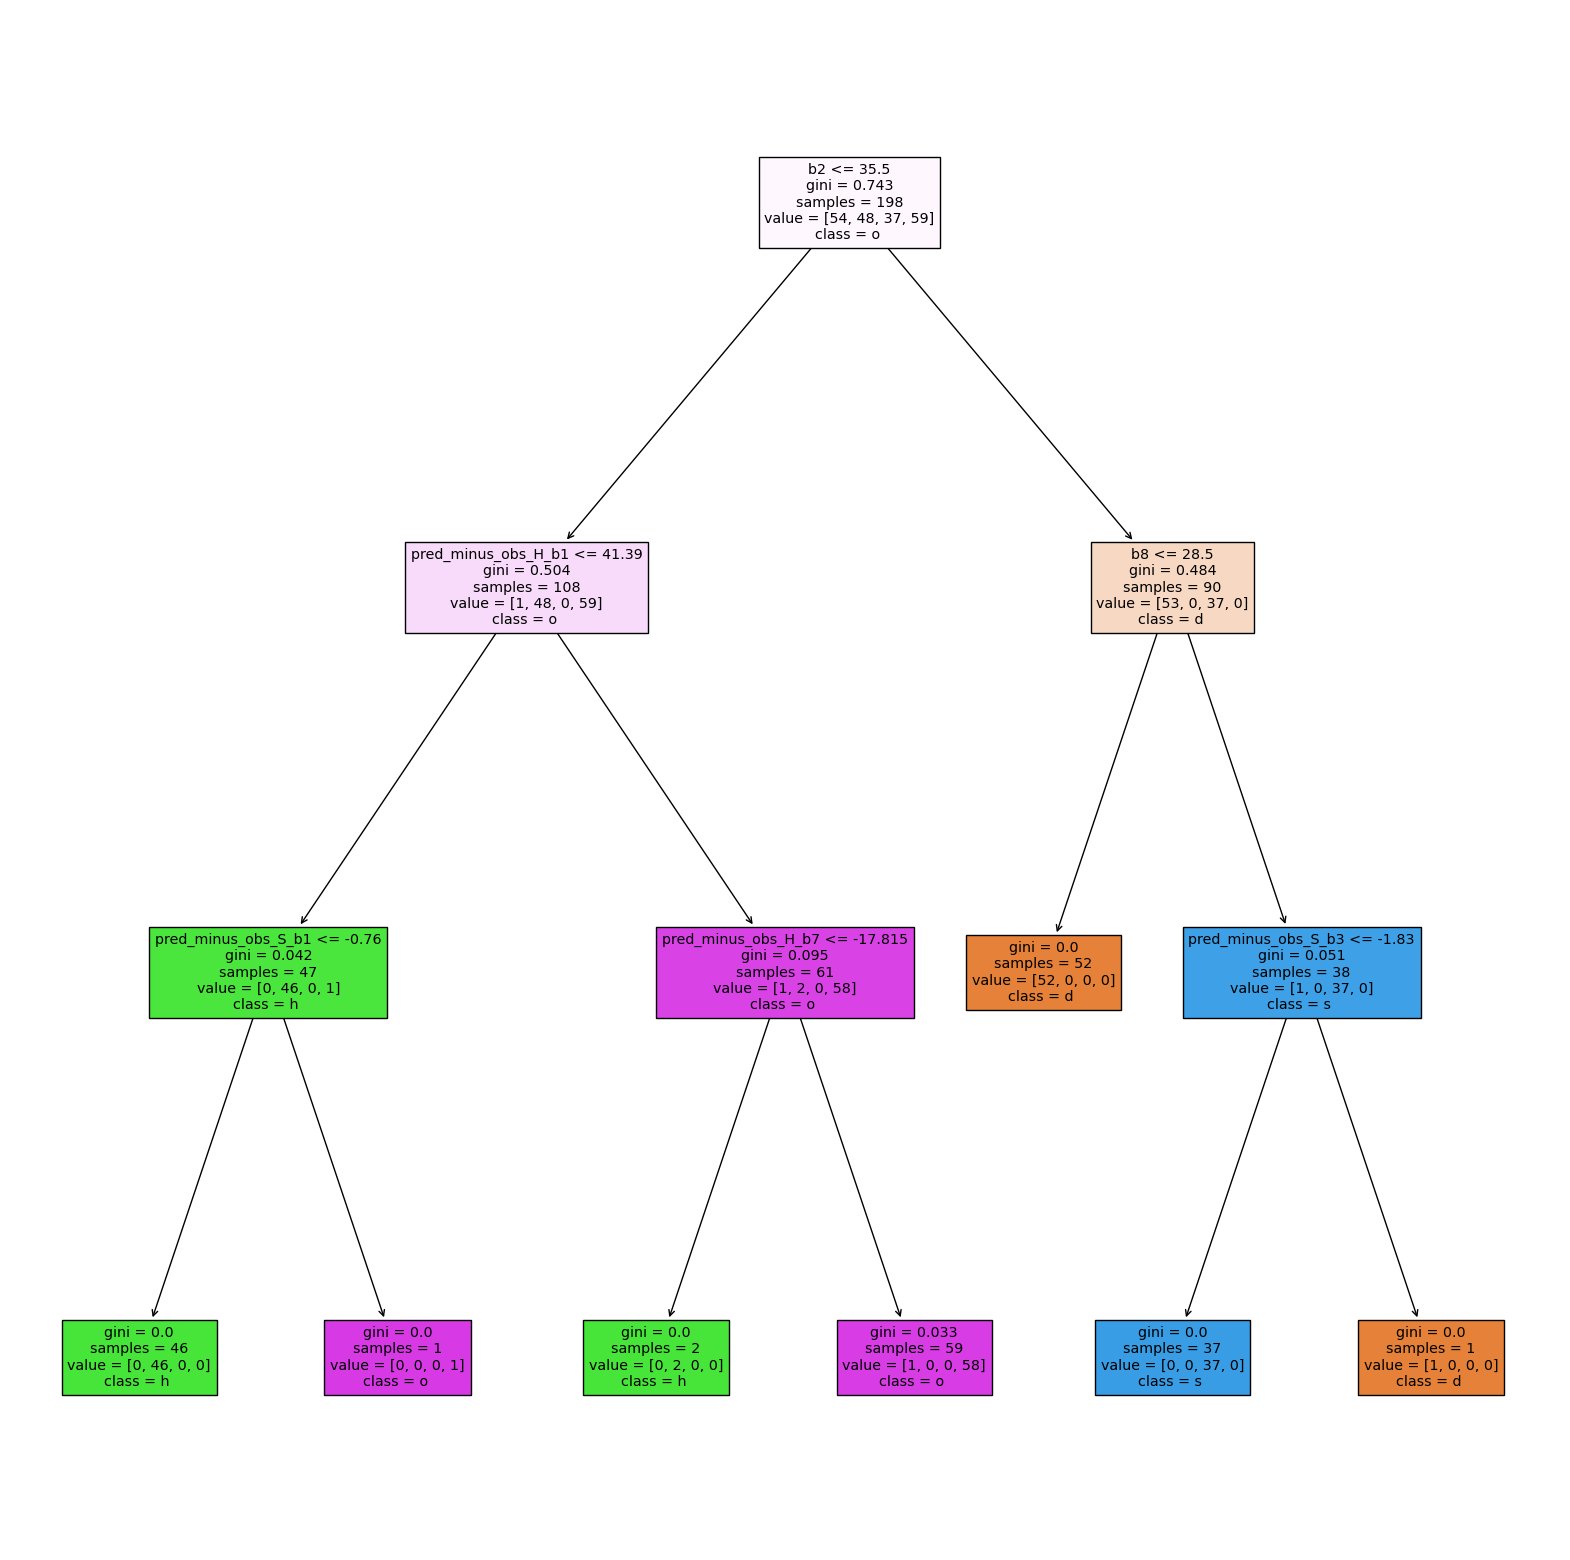

In [5]:
test_X = test_df.drop('class', axis=1)
test_Y = test_df.iloc[:, 0]

clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3).fit(train_X, train_Y)
pred_Y = clf.predict(test_X)

scale = 20
fig, ax = plt.subplots(figsize = (scale, scale))
plot_tree(clf, ax = ax, feature_names = train_X.columns, class_names = classes, filled=True)
plt.show()




1.   Выбираем $d$, если:
\begin{gather}
 \begin{cases}
   b2~>~35.5,
   \\
   b8 \le 28.5.
 \end{cases}
 \ or \
 \begin{cases}
   b2~>~35.5,
   \\
   b8 > 28.5,
   \\
   pred\_minus\_obs\_S\_b3 > -1.83.
 \end{cases}
\end{gather}
2.   Выбираем $s$, если:
\begin{gather}
 \begin{cases}
   b2~>~35.5,
   \\
   b8 > 28.5,
   \\
   pred\_minus\_obs\_S\_b3 \le -1.83.
 \end{cases}
\end{gather}
3.  Выбираем $h$, если:
\begin{gather}
 \begin{cases}
   b2~\le~35.5,
   \\
   pred\_minus\_obs\_H\_b1 \le 41.39,
   \\
   pred\_minus\_obs\_S\_b1 \le -0.76.
 \end{cases}
 \ or \
 \begin{cases}
   b2~\le~35.5,
   \\
   pred\_minus\_obs\_H\_b1 > 41.39,
   \\
   pred\_minus\_obs\_H\_b7 \le -17.815.
 \end{cases}
\end{gather}
4.  Выбираем $o$, если:
\begin{gather}
 \begin{cases}
   b2~\le~35.5,
   \\
   pred\_minus\_obs\_H\_b1 \le 41.39,
   \\
   pred\_minus\_obs\_S\_b1 > -0.76.
 \end{cases}
 \ or \
 \begin{cases}
   b2~\le~35.5,
   \\
   pred\_minus\_obs\_H\_b1 > 41.39,
   \\
   pred\_minus\_obs\_H\_b7 > -17.815.
 \end{cases}
\end{gather}


###Оцениваем метрики качества классификации (accuracy, balanced_accuracy)

---


In [13]:
print('Accuracy score is: ', accuracy_score(test_Y, pred_Y),
      '\nBalanced accuracy score is: ', balanced_accuracy_score(test_Y, pred_Y))


Accuracy score is:  0.7784615384615384 
Balanced accuracy score is:  0.766423531655225


**Вывод:** нормальная, но не отличная точность. Скорее всего это связано с тем, что у нас признаков больше, чем глубина дерева. Нужно строить лес, либо увеличивать глубину.

##***Задание 3***

###Строим зависимость точности решения на обучающей выборке и скользящем контроле: для этого используем кросс-валидацию, т.е. разобьем дадасет на $k=5$ (так как у нас он не очень большой) частей. Потом $k$ раз делаем каждую из частей тестовым множеством. И затем усрденяем полученные значения точности.

---

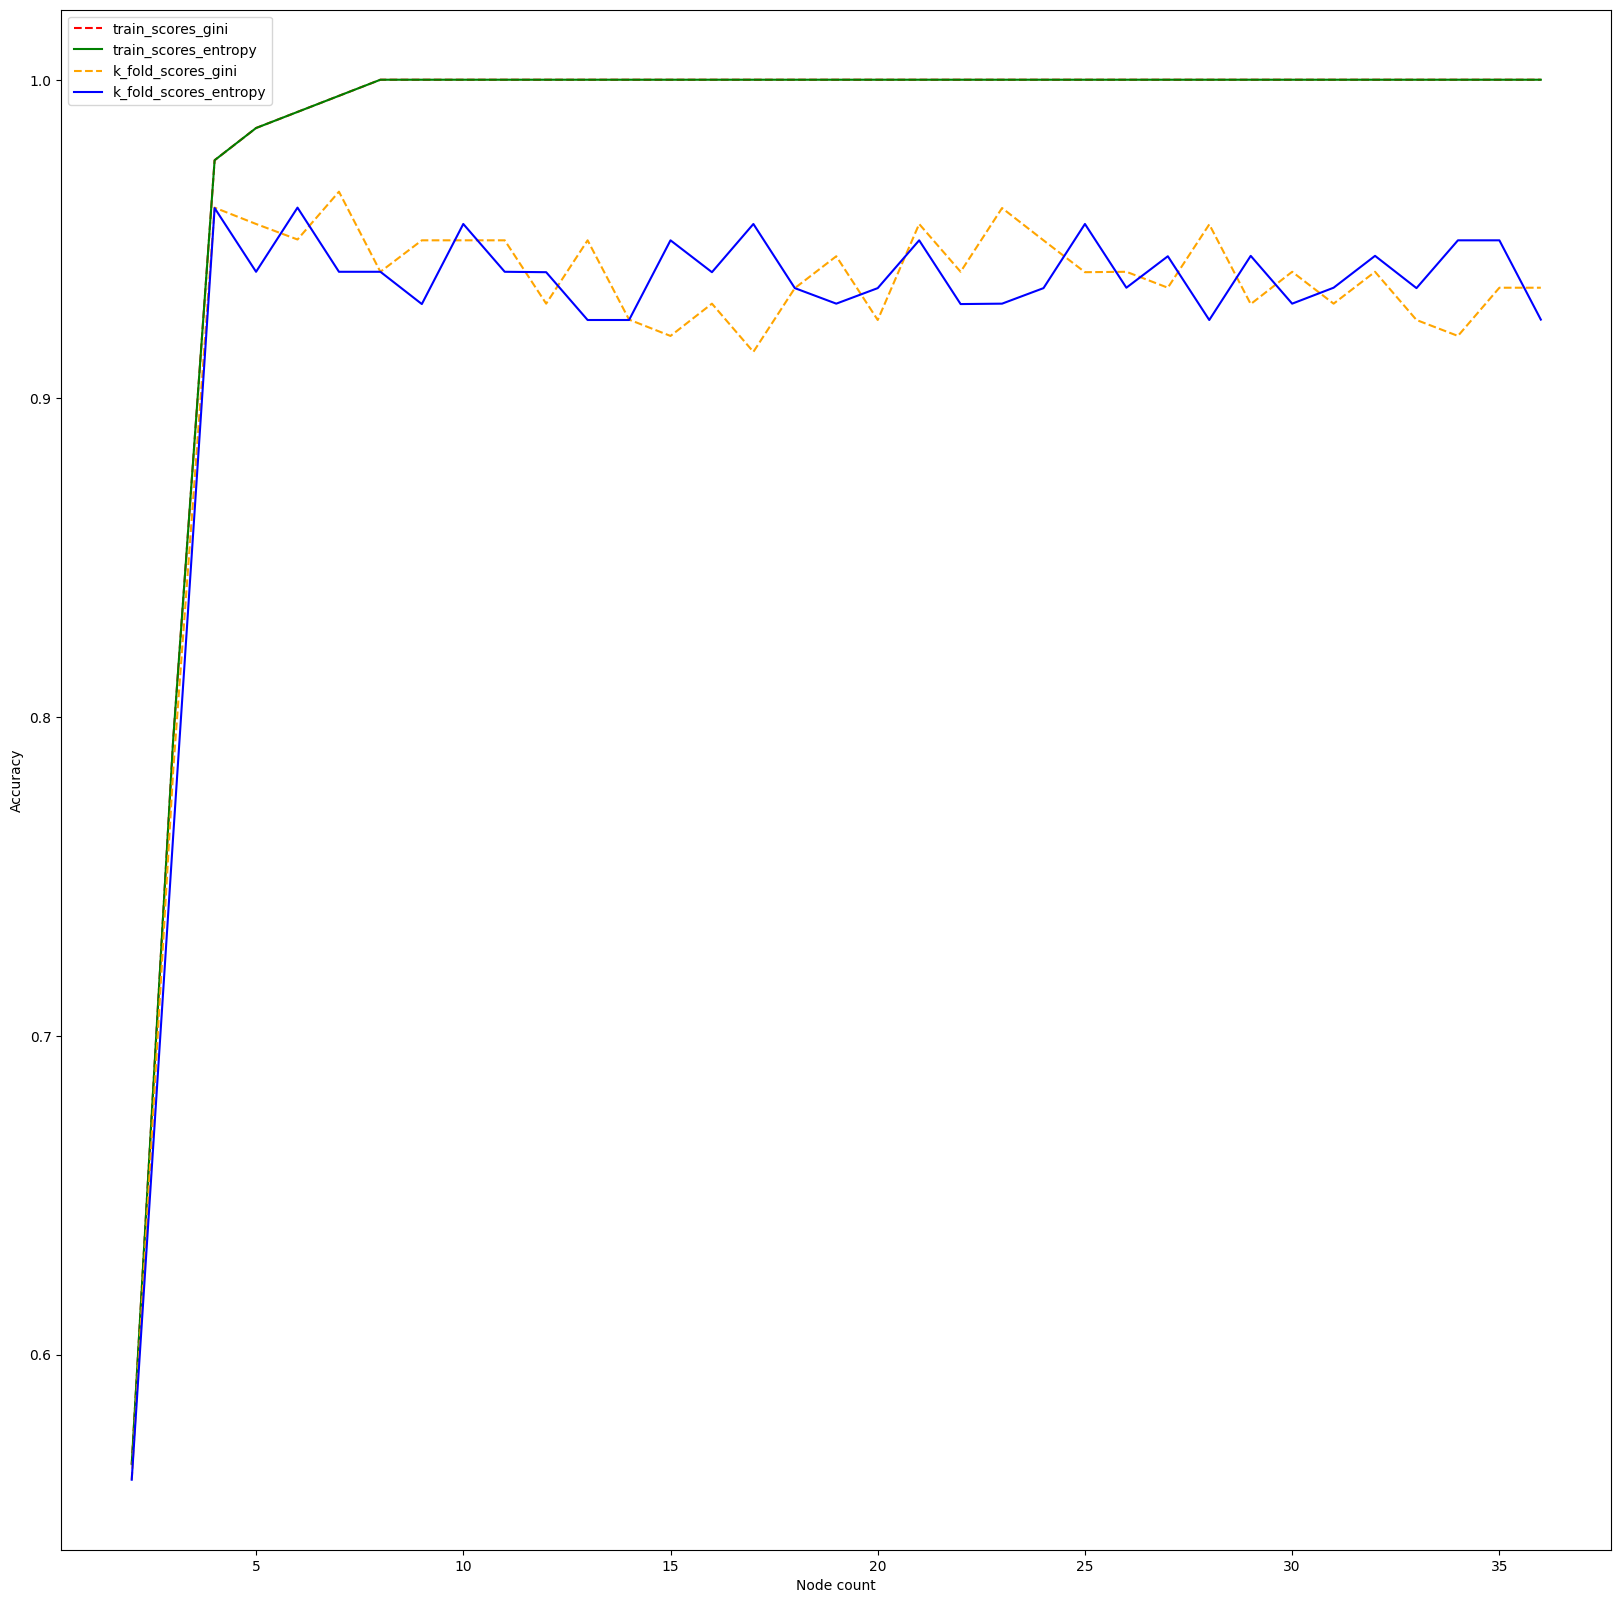

In [25]:
train_scores_gini = []
train_scores_entropy = []

k_fold_scores_gini = []
k_fold_scores_entropy = []

k = 5
max_nodes = len(train_X.columns) + 10

for i in range(2, max_nodes):
 clf = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = i)
 train_scores_gini.append(clf.fit(train_X, train_Y).score(train_X, train_Y))
 k_fold_scores_gini.append(np.mean(cross_val_score(clf, train_X, train_Y, cv = k)))

 clf = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = i)
 train_scores_entropy.append(clf.fit(train_X, train_Y).score(train_X, train_Y))
 k_fold_scores_entropy.append(np.mean(cross_val_score(clf, train_X, train_Y, cv = k)))

scale = 20
fig, ax = plt.subplots(figsize = (scale, scale))
ax.plot(range(2, max_nodes), train_scores_gini, c='red', linestyle='dashed', label='train_scores_gini')
ax.plot(range(2, max_nodes), train_scores_entropy, c='green', linestyle='solid', label='train_scores_entropy')
ax.plot(range(2, max_nodes), k_fold_scores_gini, c='orange', linestyle='dashed', label='k_fold_scores_gini')
ax.plot(range(2, max_nodes), k_fold_scores_entropy, c='blue', linestyle='solid', label='k_fold_scores_entropy')

ax.set_xlabel('Node count')
ax.set_ylabel('Accuracy')
ax.legend()

plt.show()


**Вывод:** классификации с критериями Gini и entropy не отличаются на обучающей выборке. А вот про качество модели по 5-Fold сложно что-то сказать, потому что точность по обоим критериям "скачет" (я пробовал до 300 листьев, но точность так и не регуляризовалась). Тем не менее она довольно высокая в среднем. И уже при количестве листьев 5 оба метода довольно хороши.

##***Задание 4***

###Применяем метод градиентного бустинга и выводим 3 первых дерева.

---

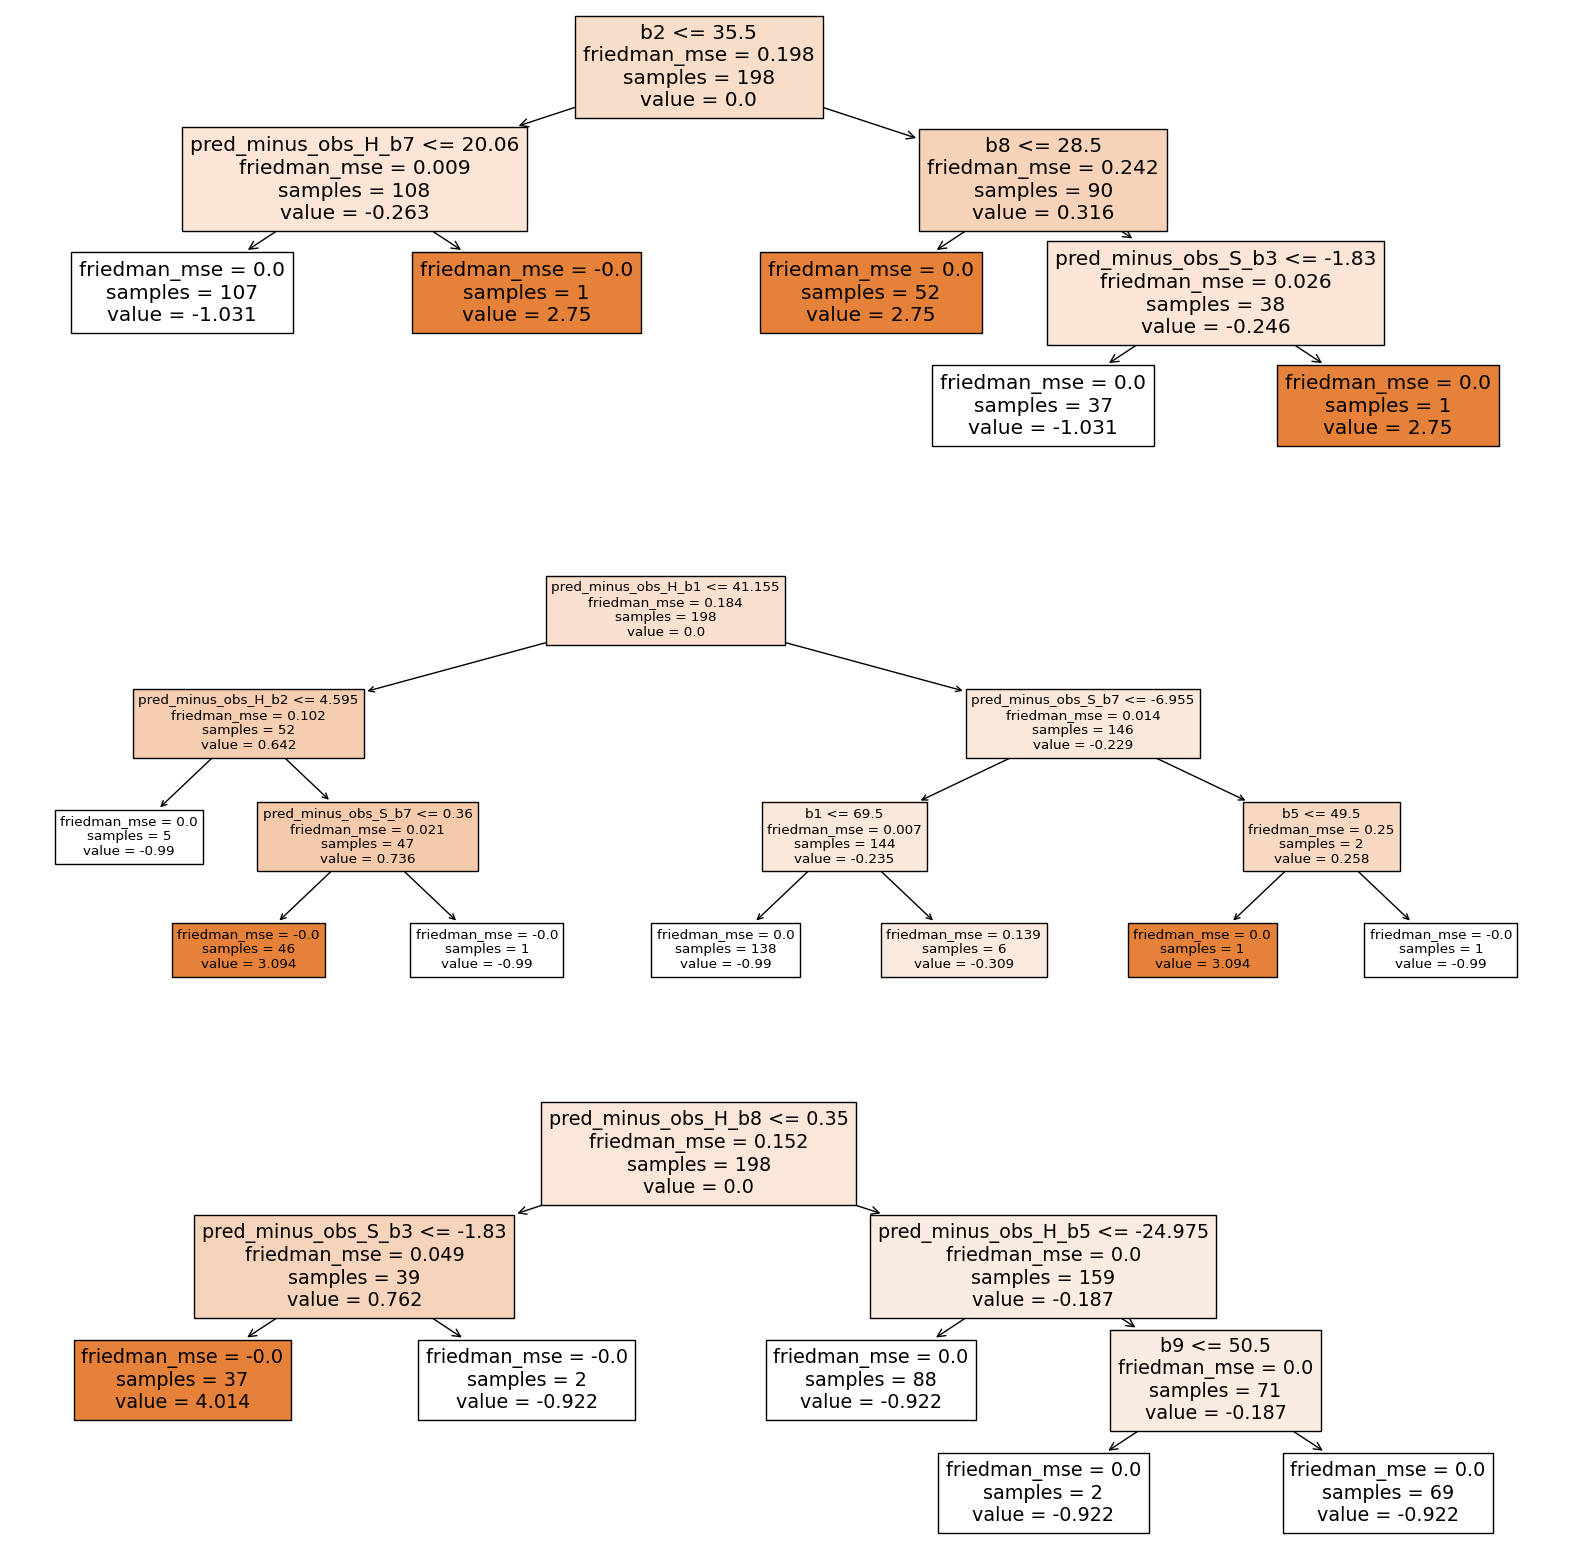

In [44]:
clf = GradientBoostingClassifier().fit(train_X, train_Y)
first_trees = clf.estimators_[:3].reshape(-1)

scale = 20

fig, axs = plt.subplots(nrows=3, figsize = (scale, scale))
for i in range(3):
 plot_tree(first_trees[i], ax = axs[i], feature_names = train_X.columns, class_names = classes, filled=True)
plt.show()


###Вычислим значимость переменных

---

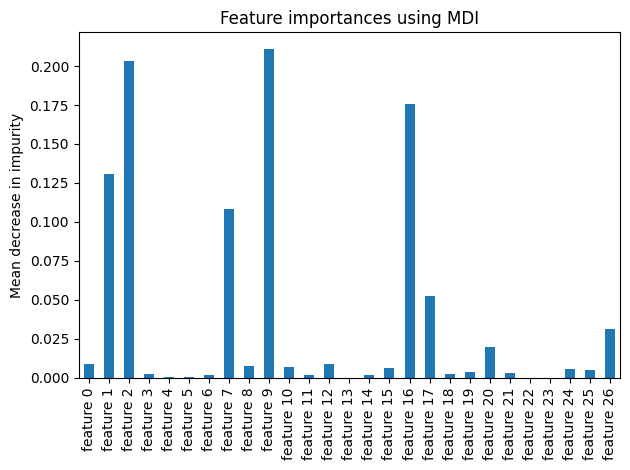

In [45]:
importances = clf.feature_importances_
feature_names = [f"feature {i}" for i in range(len(train_X.columns))]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Вывод:** из 27 признаков только 5 можно назвать важными. Остальные приблизительно одинаковые для всех классов, судя по этому графику.

###Снова оцениваем модель с помощью кросс-валидации

---

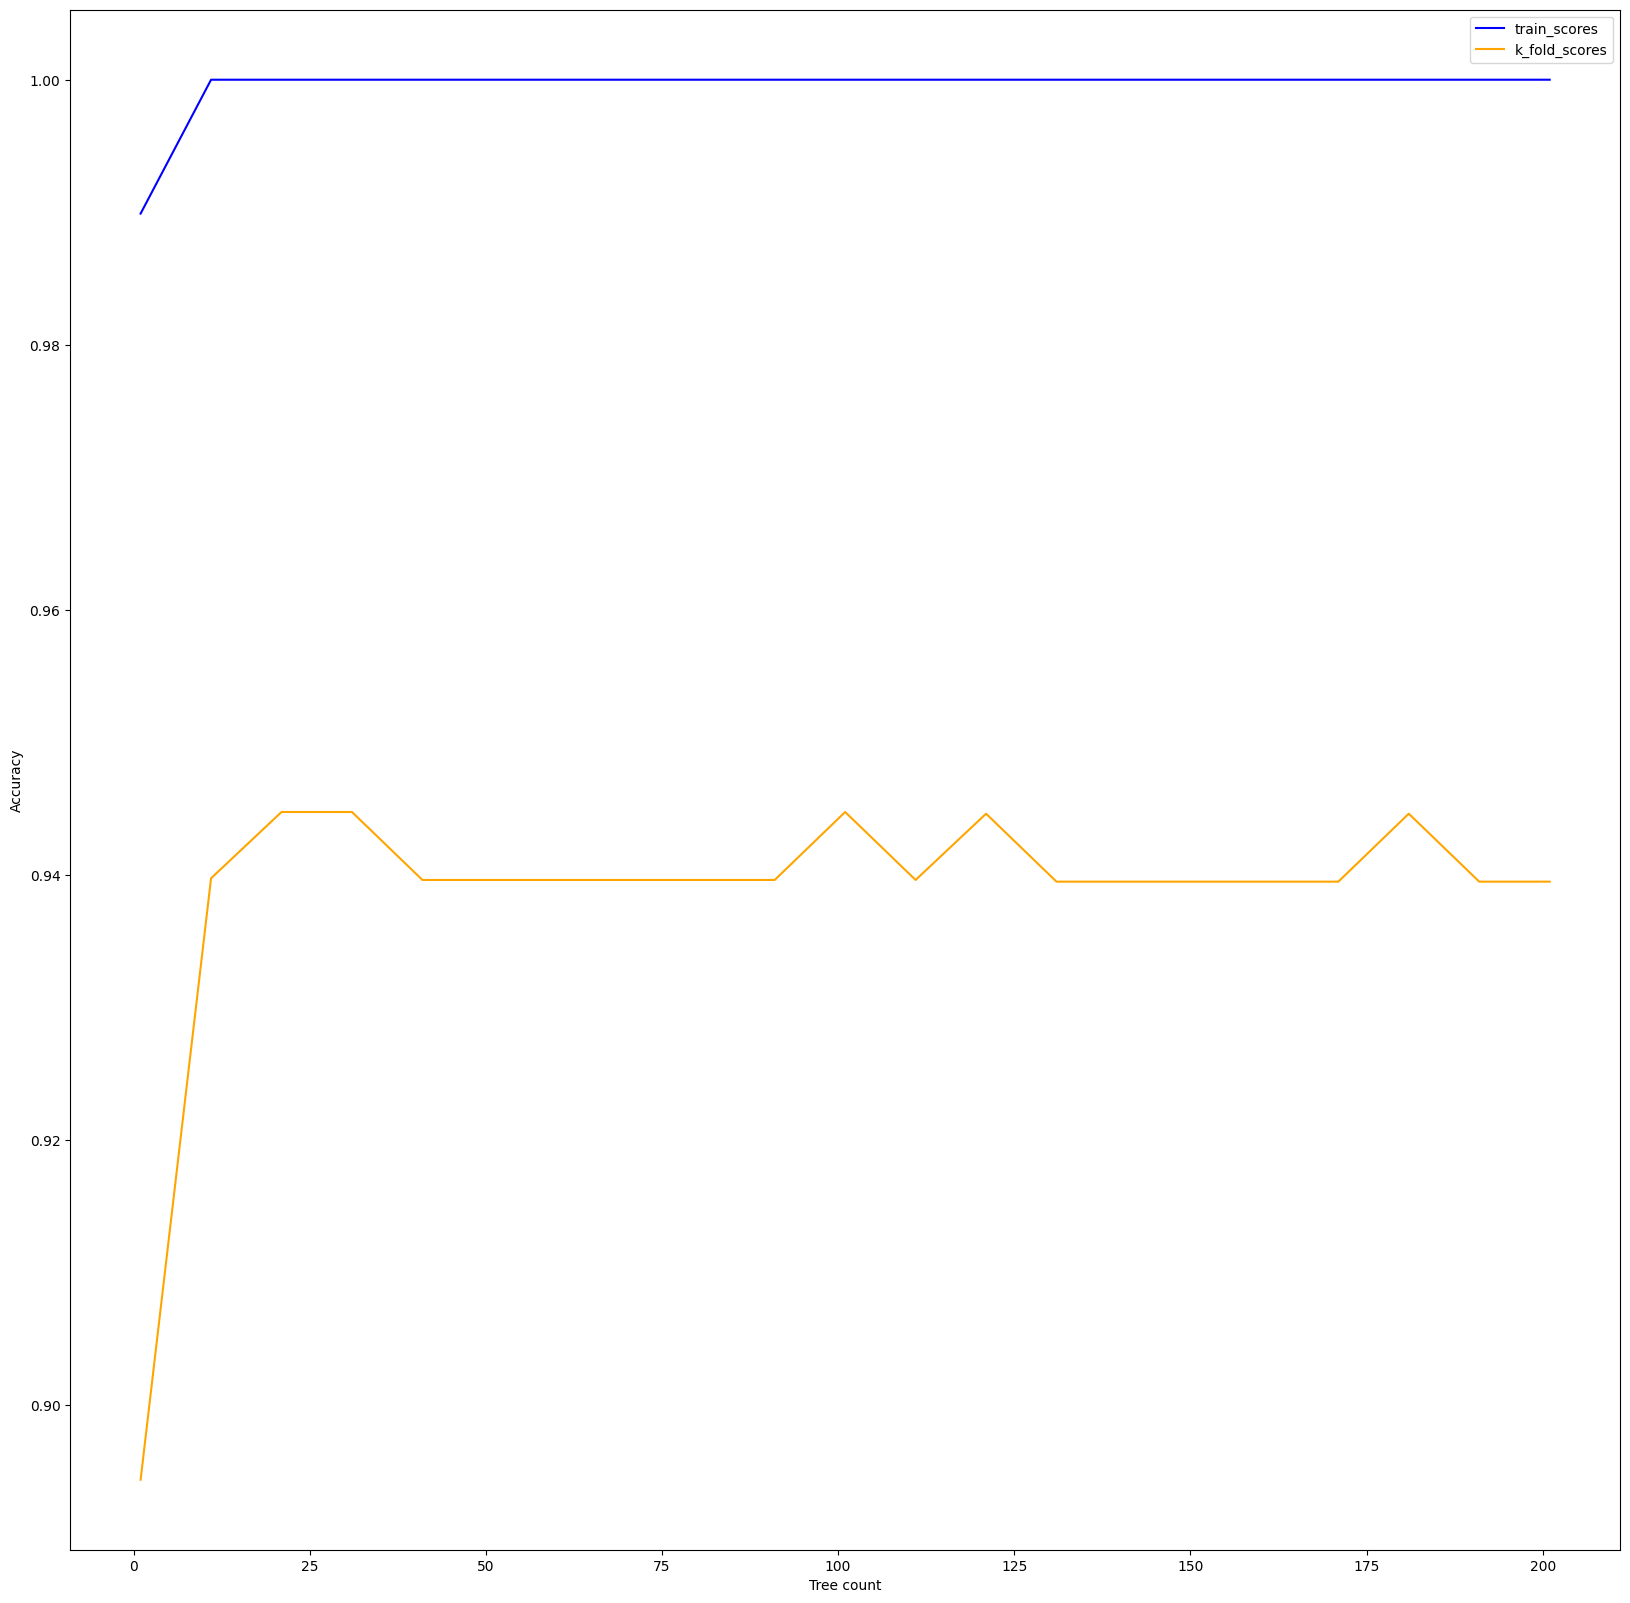

In [38]:
train_scores = []
k_fold_scores = []

k = 5
max_trees = len(train_X) + 10

for i in range(1, max_trees, 10):
 clf = GradientBoostingClassifier(n_estimators = i)
 train_scores.append(clf.fit(train_X, train_Y).score(train_X, train_Y))
 k_fold_scores.append(np.mean(cross_val_score(clf, train_X, train_Y, cv = k)))


scale = 20
fig, ax = plt.subplots(figsize = (scale, scale))
ax.plot(range(1, max_trees, 10), train_scores, c='blue', linestyle='solid', label='train_scores')
ax.plot(range(1, max_trees, 10), k_fold_scores, c='orange', linestyle='solid', label='k_fold_scores')

ax.set_xlabel('Tree count')
ax.set_ylabel('Accuracy')
ax.legend()

plt.show()

**Вывод:** примерно при 20 деревьях уже всё хорошо.

##***Задание 5***

###Применяем метод случайного леса и выводим значимость переменных.

---

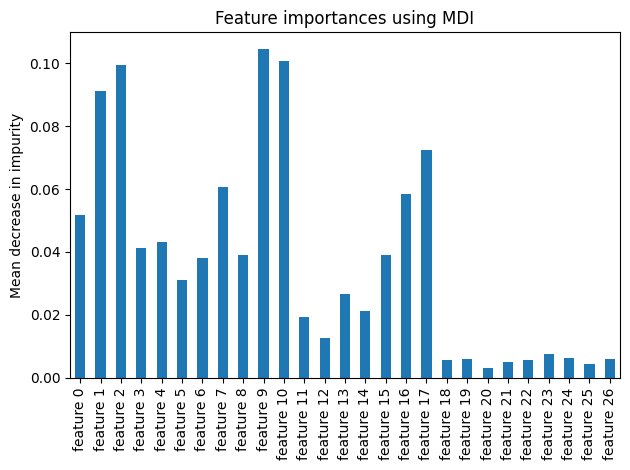

In [46]:
clf = RandomForestClassifier().fit(train_X, train_Y)

importances = clf.feature_importances_
feature_names = [f"feature {i}" for i in range(len(train_X.columns))]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Вывод:** если сравнить эту диаграмму с полученной по бустингу, мы увидим различие примерно в 2 раза. Я не знаю, как MDI зависит от метода, но сама по себе такая важность может быть неинформативна для признаков с большим количеством уникальных значений, а у меня как раз такой датасет.

Так же признаки 1, 2 и 9 в обоих случаях являются важными.

###И еще раз кросс-валидация.

---

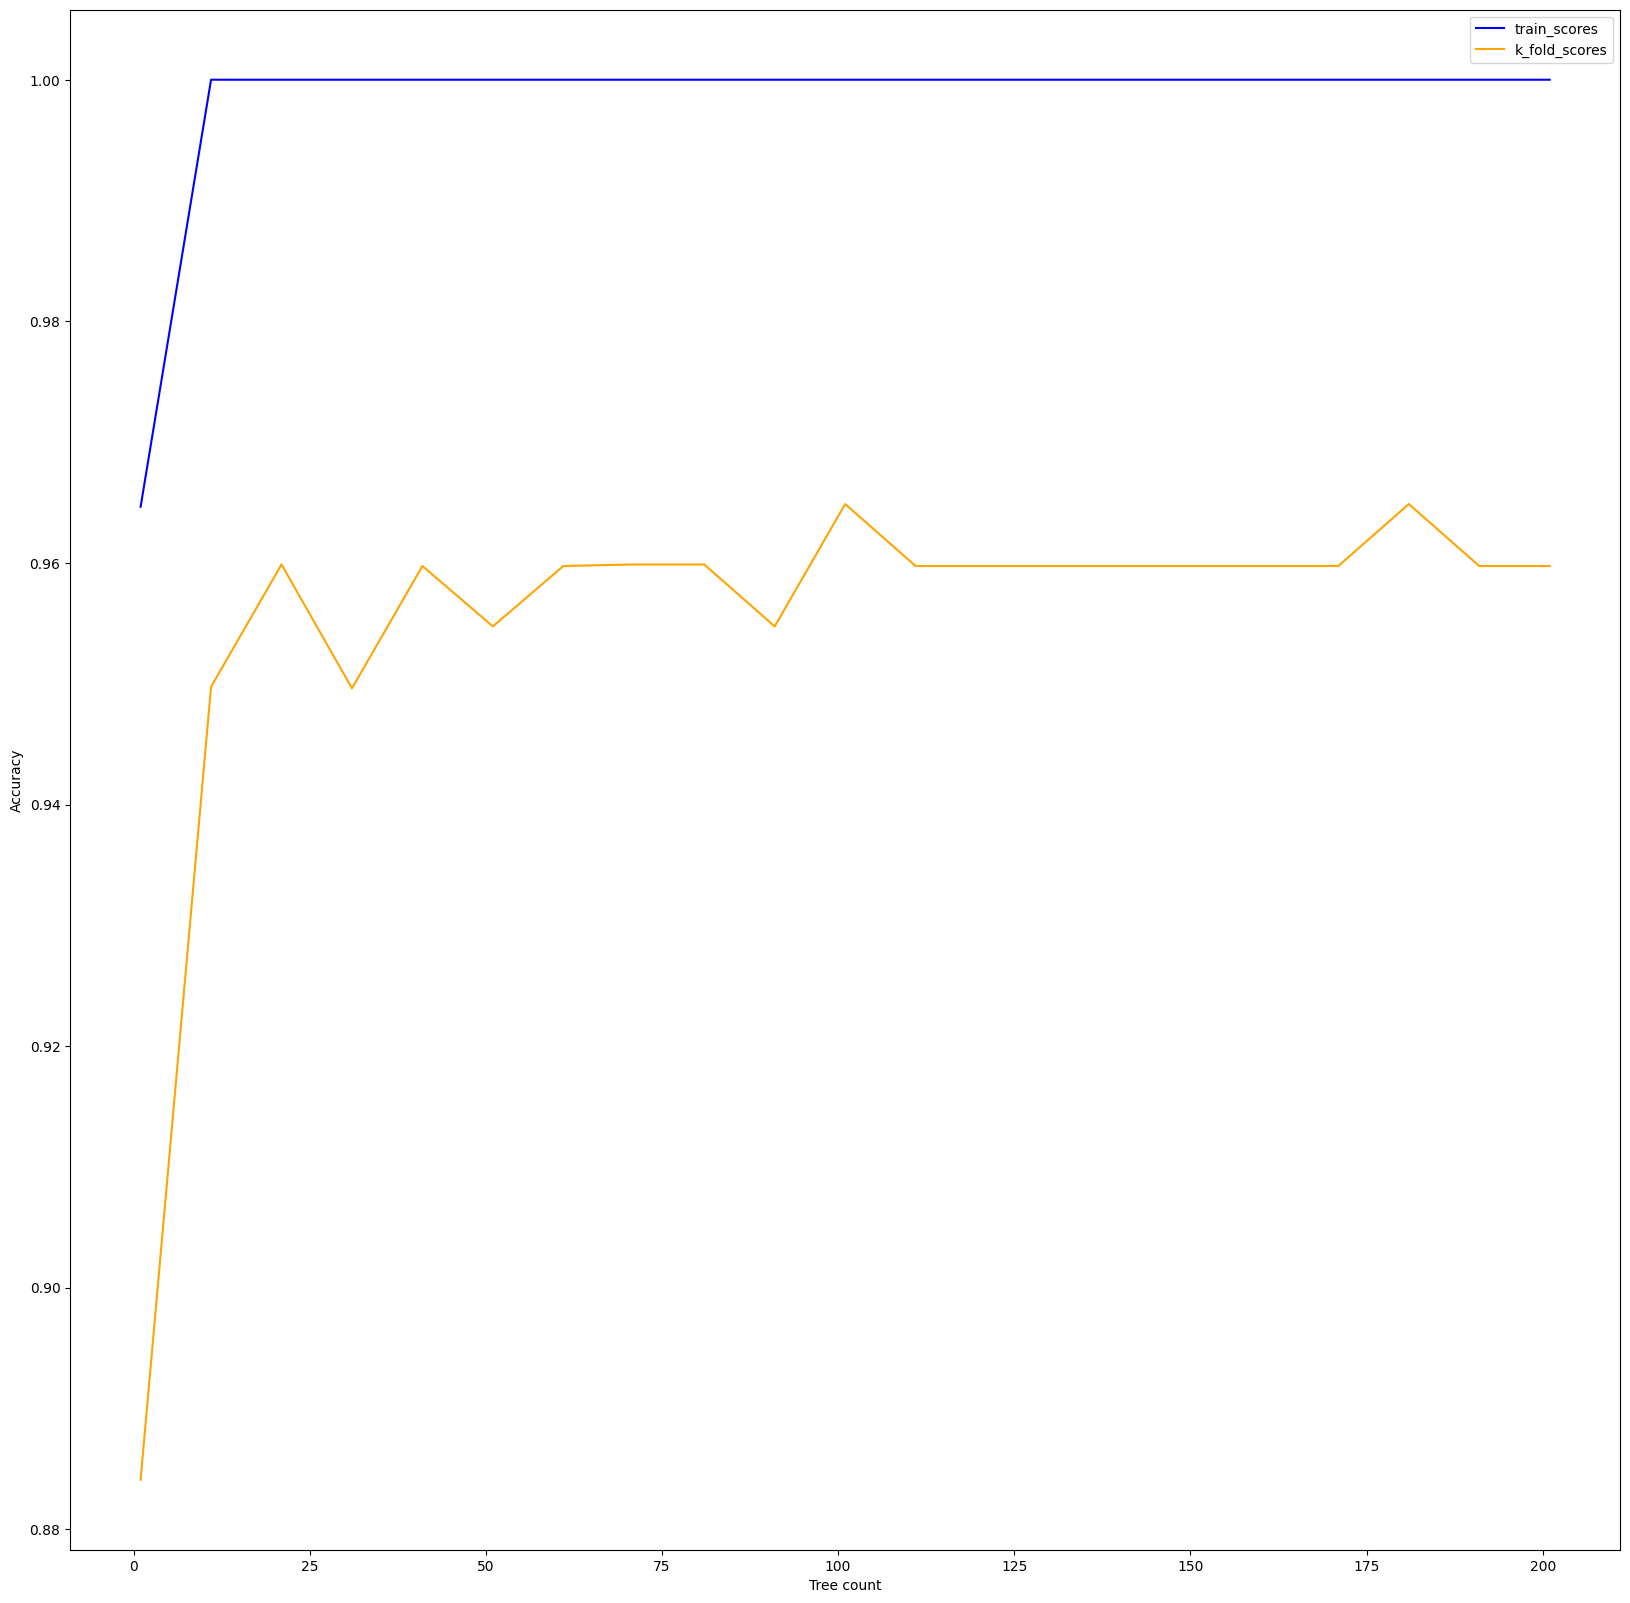

In [48]:
train_scores = []
k_fold_scores = []

k = 5
max_trees = len(train_X) + 10

for i in range(1, max_trees, 10):
 clf = RandomForestClassifier(n_estimators = i)
 train_scores.append(clf.fit(train_X, train_Y).score(train_X, train_Y))
 k_fold_scores.append(np.mean(cross_val_score(clf, train_X, train_Y, cv = k)))


scale = 20
fig, ax = plt.subplots(figsize = (scale, scale))
ax.plot(range(1, max_trees, 10), train_scores, c='blue', linestyle='solid', label='train_scores')
ax.plot(range(1, max_trees, 10), k_fold_scores, c='orange', linestyle='solid', label='k_fold_scores')

ax.set_xlabel('Tree count')
ax.set_ylabel('Accuracy')
ax.legend()

plt.show()

**Вывод:** тут так же все хорошо уже примерно при 20 деревьях.